# Accuracy analysis based on the edge type

This notebook looks at the differences in accurately  

In [1]:
import os
import sys
import time
from collections import defaultdict
from statistics import mean

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
print(sys.version)

3.6.5 (default, Apr 20 2018, 08:54:42) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-16)]


In [4]:
print(time.asctime())

Tue Apr  2 14:27:53 2019


Load excel sheets

In [7]:
DATA_FOLDER = os.path.join(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.pardir, 'data')))

# Excel sheet with statistics on activation edges
activation_stats_path = os.path.join(DATA_FOLDER, 'activation_edges_summary.csv')

# Excel sheet with statistics on inhibition edges
inhibition_stats_path = os.path.join(DATA_FOLDER, 'inhibition_edges_summary.csv')

#### Exclusion criteria
1. In one particular case, for GABRG1, there was only one statement extracted and this statement was wrong
2. For SLC5A7, INDRA made the same error consistently through the excel sheet and there was not any correct
3. MAPT and GSK3B were curated but they did not follow the rational curation procedure.

In [8]:
BLACKLIST = {'SLC5A7', 'GSK3B', 'MAPT', 'GABRG1'}

Load excel sheets with Pandas and replace NaN by zeros

In [9]:
activation_df = pd.read_csv(activation_stats_path, index_col=0)
activation_df.fillna(0, inplace=True)
activation_df = activation_df[[v not in BLACKLIST for v in activation_df.index]]

In [11]:
inhibition_df = pd.read_csv(inhibition_stats_path, index_col=0)
inhibition_df.fillna(0, inplace=True)
inhibition_df = inhibition_df[[v not in BLACKLIST for v in inhibition_df.index]]

Analyzing the accuracy of INDRA to extract correct BEL statements depending on the edge type

In [22]:
def get_accuracies(df):
    """Calculate number of correct statements identified by INDRA for each gene (correct / total curated)"""
    avg_corrected = {}
    for gene_symbol, (correct, error, other_statement, modified, not_curated, total) in df.iterrows():
        
        # Count how many were curated
        total_curated = total - not_curated
        
        if total_curated == 0:
            continue

        # Calculate accuracy
        avg_corrected[gene_symbol] = correct / total_curated
        
    return avg_corrected


In [23]:
activation_avgs = get_accuracies(activation_df)
inhibition_avgs = get_accuracies(inhibition_df)

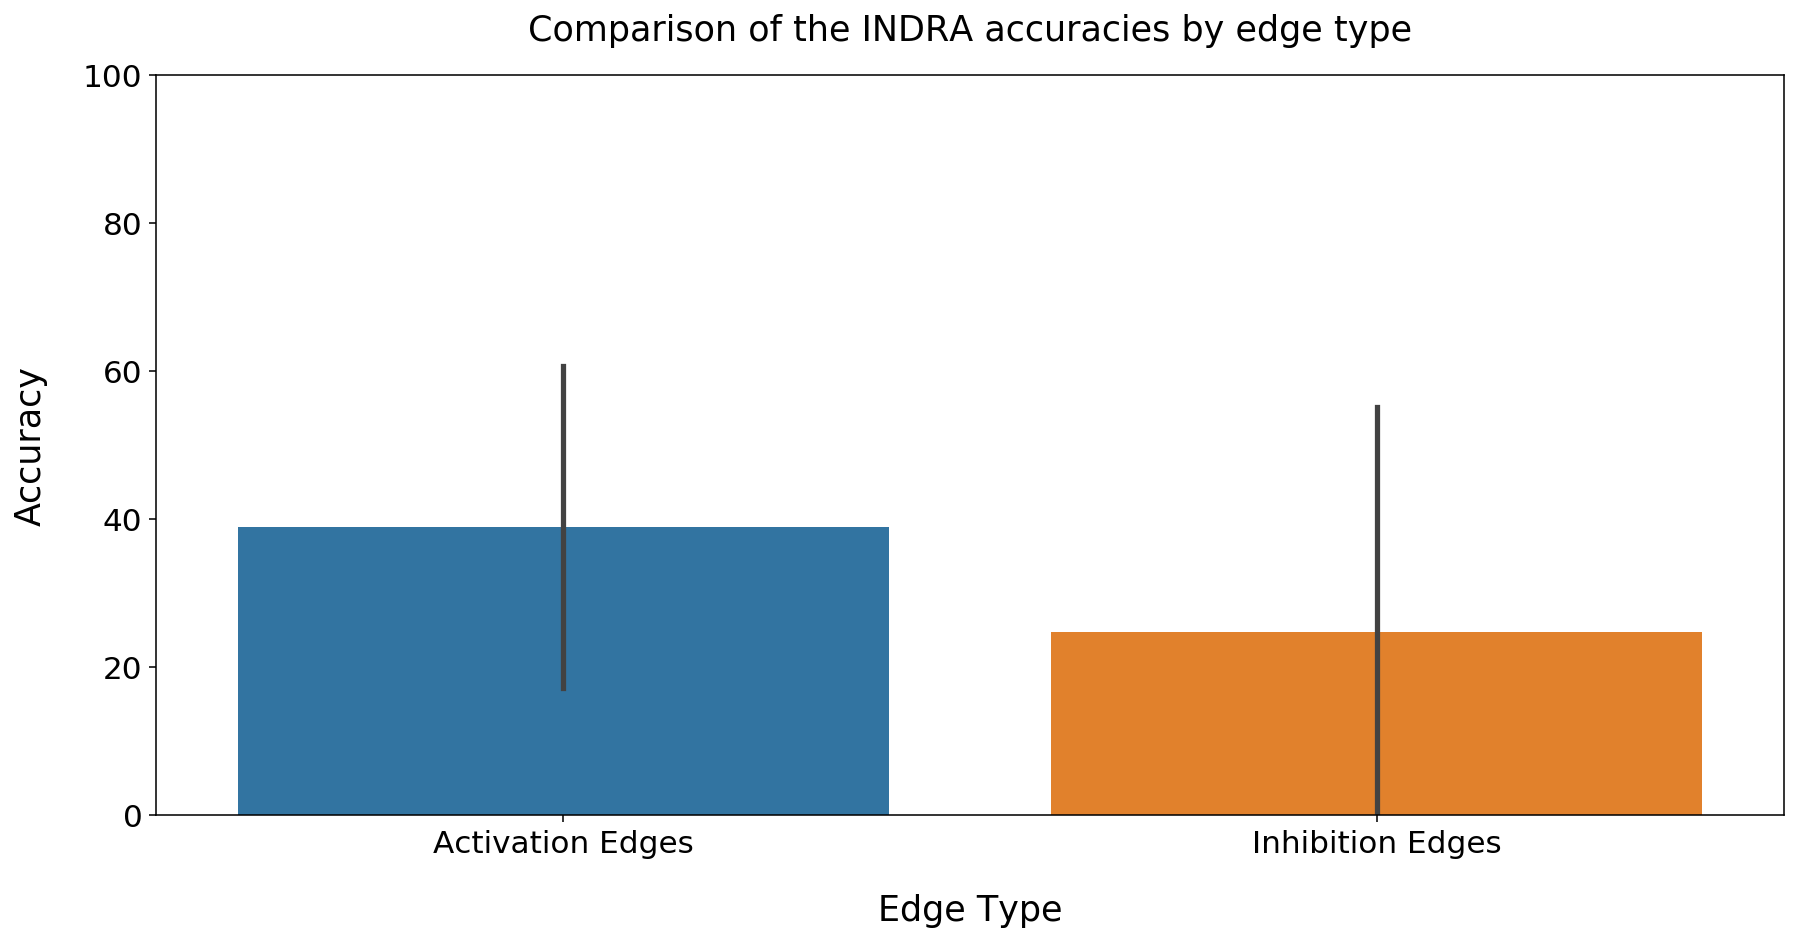

In [34]:
plt.figure(num=None, figsize=(15, 7), dpi=140, facecolor='w', edgecolor='k')

# get axes of the current figure
ax = plt.gca()

# Labels
ax.set_title('Comparison of the INDRA accuracies by edge type', fontsize=18, pad=18)
ax.set_xlabel("Edge Type", fontsize=18, labelpad=18)
ax.set_ylabel("Accuracy", fontsize=18, labelpad=18)
ax.set_ylim(0, 100)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

"""Figure b)"""

data_dict = {
    "Activation Edges": [
        value * 100
        for value in activation_avgs.values() # Normalize statements extracted to 100%
    ],
    "Inhibition Edges" : [
        value * 100
        for value in inhibition_avgs.values() # Normalize statements extracted to 100%
    ]
}

# Data
data = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data_dict.items() ]))

# Plot
sns.barplot(data = data, ci="sd")

plt.show()

__Figure 1.__ Distribution of the INDRA statement accuracies depending on the edge type. Activation edges account for all *increases* and *direcltyIncreases* BEL relationships, while inhibition edges account for all *decreases* and *direcltyDecreases* BEL relationships.